In [ ]:
from google.colab import files
uploaded = files.upload()
#uploaded = files.upload

Saving categories-aman.txt to categories-aman.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f = open("categories-aman.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [ ]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)

['circle', 'hexagon', 'line', 'moon', 'octagon', 'smiley_face', 'square', 'star', 'triangle', 'umbrella']


In [ ]:
!mkdir data

In [ ]:
import urllib
def download():

  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [ ]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/circle.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/hexagon.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/line.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/moon.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/octagon.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/smiley%20face.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/square.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/star.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/triangle.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/umbrella.npy


In [ ]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

In [ ]:
def load_data(root, vfold_ratio=0.1, max_items_per_class=5000):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file
    for idx, file in enumerate(all_files):
        print(idx)
        print(file)
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None

    #randomize the dataset
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [ ]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

0
data/circle.npy
1
data/triangle.npy
2
data/moon.npy
3
data/line.npy
4
data/smiley_face.npy
5
data/hexagon.npy
6
data/square.npy
7
data/octagon.npy
8
data/umbrella.npy
9
data/star.npy


In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

45000
45000
5000
5000


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 113.
   87.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  71. 255.
  220.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 151. 255.
  255.  42.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 210. 197.
  253. 119.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 249. 130.
  197. 196.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

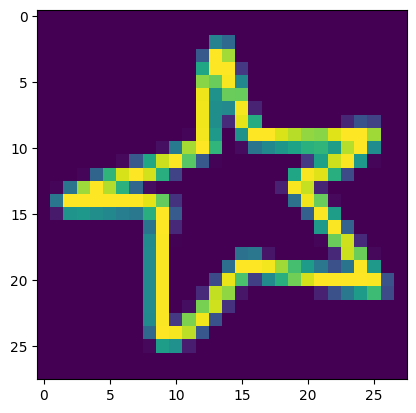

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, len(x_train))
print(x_train[idx].reshape(28,28))
plt.imshow(x_train[idx].reshape(28,28))
print(class_names[int(y_train[idx].item())])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.Convolution2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))

model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
# Train model
# adam = tf.train.AdamOptimizer()
adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                   

In [ ]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=30)

Epoch 1/30
159/159 - 9s - loss: 0.8722 - top_k_categorical_accuracy: 0.9507 - val_loss: 0.5869 - val_top_k_categorical_accuracy: 0.9798 - 9s/epoch - 54ms/step
Epoch 2/30
159/159 - 6s - loss: 0.4949 - top_k_categorical_accuracy: 0.9821 - val_loss: 0.4141 - val_top_k_categorical_accuracy: 0.9876 - 6s/epoch - 38ms/step
Epoch 3/30
159/159 - 6s - loss: 0.4021 - top_k_categorical_accuracy: 0.9858 - val_loss: 0.3717 - val_top_k_categorical_accuracy: 0.9836 - 6s/epoch - 40ms/step
Epoch 4/30
159/159 - 6s - loss: 0.3584 - top_k_categorical_accuracy: 0.9878 - val_loss: 0.3556 - val_top_k_categorical_accuracy: 0.9887 - 6s/epoch - 41ms/step
Epoch 5/30
159/159 - 6s - loss: 0.3314 - top_k_categorical_accuracy: 0.9895 - val_loss: 0.3281 - val_top_k_categorical_accuracy: 0.9884 - 6s/epoch - 39ms/step
Epoch 6/30
159/159 - 6s - loss: 0.3118 - top_k_categorical_accuracy: 0.9902 - val_loss: 0.3276 - val_top_k_categorical_accuracy: 0.9896 - 6s/epoch - 39ms/step
Epoch 7/30
159/159 - 7s - loss: 0.2955 - top_k

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

45000
45000
5000
5000
Test accuarcy: 98.54%


1/1 [==============================] - 0s 24ms/step
['star']


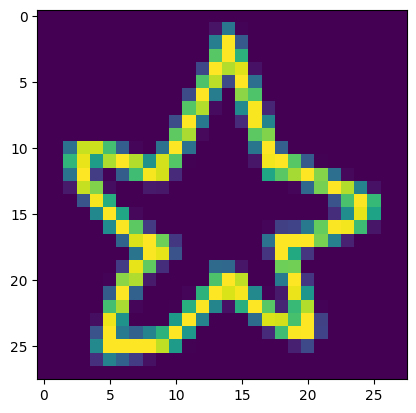

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img)
pred = model.predict(np.expand_dims(img, axis=0))[0]

ind = (-pred).argsort()[:1]
latex = [class_names[x] for x in ind]
print(latex)

In [ ]:
model.save('doodle-10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
x_test[0].shape

(28, 28, 1)

In [ ]:
x_test[0].shape

(28, 28, 1)

In [27]:
class_names

['circle',
 'triangle',
 'moon',
 'line',
 'smiley_face',
 'hexagon',
 'square',
 'octagon',
 'umbrella',
 'star']